In [1]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.gridspec as gridspec

## Lorenz System

The Lorenz Equations are a system of three coupled, first-order, nonlinear differential equations which describe the trajectory of a particle through time. The system was originally derived by Lorenz as a model of atmospheric convection, but the deceptive simplicity of the equations have made them an often-used example in fields beyond atmospheric physics.

The equations describe the evolution of the spatial variables $x$, $y$, and $z$, given the governing parameters $\sigma$, $\beta$, and $\rho$, through the specification of the time-derivatives of the spatial variables:

\begin{eqnarray} 
\dot{x} &= &\sigma(y-x)\\ 
\dot{y} &= &(\rho-z)x - y\\ 
\dot{z} &= &xy-\beta z 
\end{eqnarray}

The resulting dynamics are entirely deterministic giving a starting point $(x_0, y_0, z_0)$ and a time interval $t$. Though it looks straightforward, for certain choices of the parameters $(\sigma, \rho, \beta)$, the trajectories become chaotic, and the resulting trajectories display some surprising properties. The system exhibits chaotic behaviour if all the three constants \($\sigma,\rho,\beta$) are set to specific values.

\begin{eqnarray} 
\sigma &= &10\\ 
\rho &= &28\\ 
\beta &= &\frac{8}{3} 
\end{eqnarray}

Though no general analytic solution exists for this system, the solutions can be computed numerically.  Python makes this sort of problem very easy to solve: one can simply use Scipy's interface to ODEPACK, an optimized Fortran package for solving ordinary differential equations.

The above three equations characterize how the state derivatives \($\dot{x},\dot{y},\dot{z}$) depend on \($x,y,z$) and the constants \($\sigma,\rho,\beta$)\. The function below implements this, set some initial conditions, decide on a time array to simulate over, and run the simulation using odeint().

Lorenz Attractor model is used to get simulated real-time vibration sensor data in a bearing.

In [2]:
def colorline3d(ax, x, y, z, cmap):
    N = len(x)
    skip = int(0.01*N)
    for i in range(0,N,skip):
        ax.plot(x[i:i+skip+1], y[i:i+skip+1], z[i:i+skip+1], color=cmap(int(255*i/N)))

    
# function that returns dx/dt
def f(x,t, sigma=10.0, beta=8.0/3.0, rho=28.0): # x is 3 x 1
        
    f1 = sigma*(x[1]-x[0])
    f2 = x[0]*(rho-x[2])-x[1]
    f3 = x[0]*x[1]-beta*x[2]
    f = np.array([f1,f2,f3])
    return f

def simulate(t_star, x0, noise, param_s=10.0, param_b=8.0/3.0, param_r=28.0):
    # solve ODE
    X_star = odeint(f, x0, t_star, args=(param_s, param_b, param_r))

    skip = 1
    dt = t_star[skip] - t_star[0]
    _data_sim = X_star[0::skip,:]
    _data_sim = _data_sim + noise*_data_sim.std(0)*np.random.randn(_data_sim.shape[0], _data_sim.shape[1])
    _data_sim = np.reshape(_data_sim, (_data_sim.shape[0],_data_sim.shape[1]))
    return _data_sim

# time points
time_points = np.arange(0,25,0.01)
    
# initial condition
x0 = np.array([-8.0, 7.0, 27])

_data_train = simulate(time_points, x0, 0)
_data_noise = simulate(time_points, x0, 0.3)
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)

## Visually inspect the data

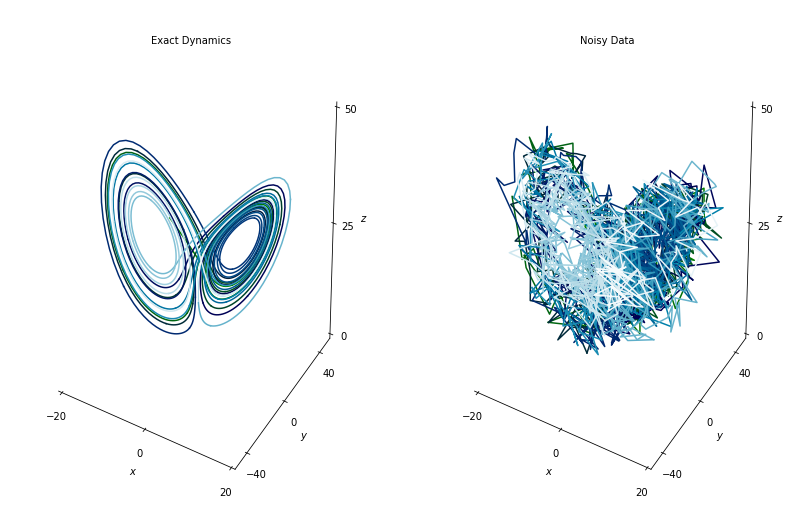

In [3]:
####### Plotting ################## 
def plotComparison(dataset1, title1, dataset2, title2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    ax.axis('off')

    gs0 = gridspec.GridSpec(1, 2)
    gs0.update(top=0.95, bottom=0.1, left=0.0, right=0.90, wspace=0.15)

    ax = plt.subplot(gs0[:, 0:1], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    colorline3d(ax, dataset1[:,0], dataset1[:,1], dataset1[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title1, fontsize = 10)

    ax = plt.subplot(gs0[:, 1:2], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))    
    colorline3d(ax, dataset2[:,0], dataset2[:,1], dataset2[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title2, fontsize = 10)
    
plotComparison(_data_train, 'Exact Dynamics', _data_noise, 'Noisy Data')

In [4]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, SimpleRNN
from keras.utils.vis_utils import plot_model
import pickle

/Users/ldalmeida/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import tensorflow as tf
import tflearn
import tensorflow.contrib.layers as tflayers
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
from ComplexRNN import ComplexRNNCell
from URNN import URNNCell

While this system oscillates between two semi-stable states, it is hard to identify any regular patterns

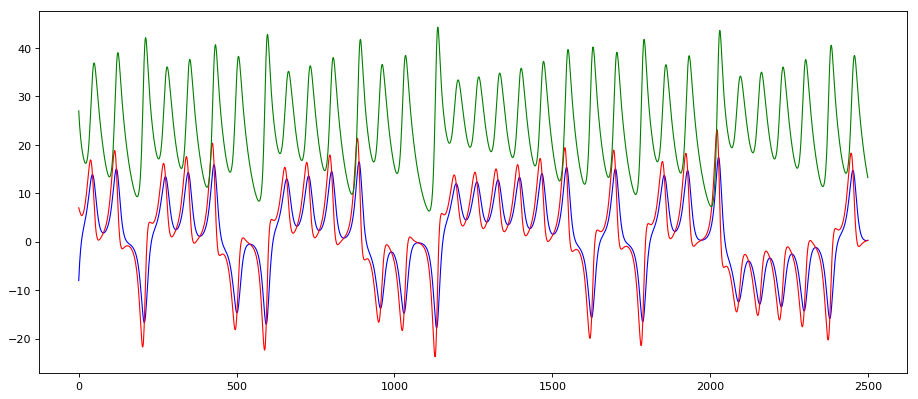

In [6]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(_data_train)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), _data_train[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,2], '-', color='green', animated = True, linewidth=1)

### Compare frequencies of healthy and noisy data

In [7]:
data_train_fft = np.fft.fft(_data_train)
data_noise_fft = np.fft.fft(_data_noise)

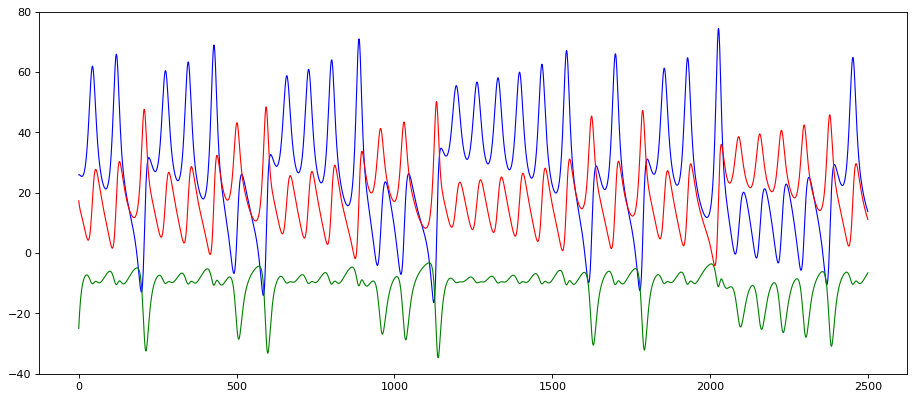

In [8]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_train_fft)
ax.plot(range(0,size), data_train_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

Note: I am plotting the imaginary part of the red dimension to see three lines because two dimensions on this dataset are completely overlapping in frequency and the real part is zero.

It is evident that there are lot of frequencies present in noisy signal.

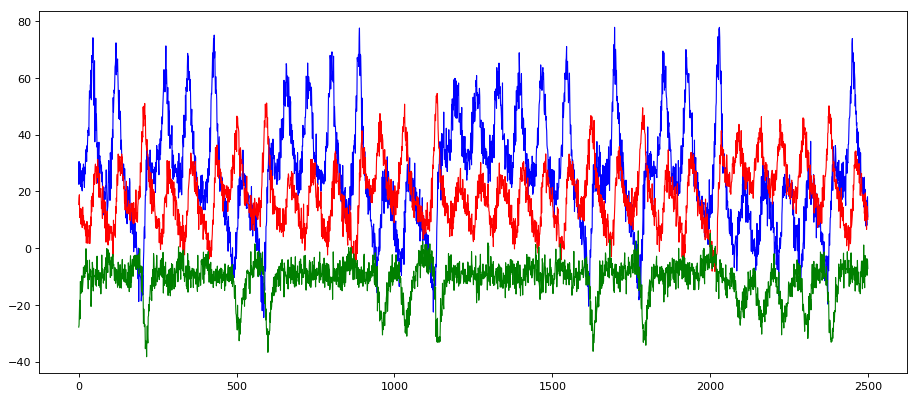

In [9]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_noise_fft)
ax.plot(range(0,size), data_noise_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

## Real valued neural networks

Based on research (the 2012 Stanford publication titled Deep Learning for Time Series Modeling by Enzo Busseti, Ian Osband, and Scott Wong), I will skip experimenting with deep feed-forward neural networks and directly start experimenting with a deep, recurrent neural network because it uses LSTM layers. Using LSTM layers is a way to introduce memory to neural networks that makes them ideal for analyzing time-series and sequence data.
### Data pre-processing for Keras neural networks

In [10]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(_data_train)
X_noise_scaled = scaler.transform(_data_noise)

LSTMs want their input to contain windows of times. This way instead of 2500 samples per dimension we have 250 batches of length 10. Here, the objective is given the last 10 time steps of the signal predict the future 10.

In [11]:
timesteps = 10
dim = 3
samples = 2500
X_train_scaled = X_train_scaled.reshape(int(samples/timesteps),timesteps,dim)
X_noise_scaled = X_noise_scaled.reshape(int(samples/timesteps),timesteps,dim)

In [12]:
losses = []
 
def handleLoss(loss):
        global losses
        losses+=[loss]
        print(loss)
 
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

### Simple Sequential Model

In [13]:
# Build neural network
def _simple_sequential_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(timesteps,dim)))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='relu'))

    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='mse')
    return model

In [14]:
mod_1 = _simple_sequential_model()
print(mod_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10, 50)            200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10, 25)            1275      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 25)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 10, 3)             78        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________
None


### Simple Recurrent Neural Network

In [15]:
# Build neural network
def _simple_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(Dense(3))
    # Compile model
    model.compile(optimizer='adam',
                  loss='mean_squared_error')
    return model

In [16]:
mod_2 = _simple_rnn_model()
plot_model(mod_2, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)
print(mod_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 50)            2700      
_________________________________________________________________
dense_4 (Dense)              (None, 10, 3)             153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Neural Networks

In [17]:
from keras import regularizers
# design network
def _deep_lstm_model():
    model = Sequential()

    # test with 5 sequential layers
    # single layer with more units
    # weight reg and drop outs
    """model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True, dropout=0.2, 
                   bias_regularizer=regularizers.l1(0.01)))"""
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(Dense(3))
    model.compile(loss='mae', optimizer='adam')
    return model

In [18]:
mod_3 = _deep_lstm_model()
print(mod_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            10800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dense_5 (Dense)              (None, 10, 3)             153       
Total params: 91,753
Trainable params: 91,753
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
mod_1.fit(X_train_scaled, X_train_scaled,
        validation_data = (X_train_scaled, X_train_scaled),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)

Train on 250 samples, validate on 250 samples
Epoch 1/50
 72/250 [=======>......................] - ETA: 1s - loss: 0.21170.21171772
0.1936401
0.16395225
0.1156403
250/250 [==============================] - 1s 2ms/step - loss: 0.1797 - val_loss: 0.1396
Epoch 2/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.14060.14060679
0.13605218
0.113734454
0.08426064
250/250 [==============================] - 0s 53us/step - loss: 0.1239 - val_loss: 0.0782
Epoch 3/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.10870.108679295
0.101447485
0.08893605
0.07526341
250/250 [==============================] - 0s 54us/step - loss: 0.0964 - val_loss: 0.0500
Epoch 4/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.09330.09330323
0.089359894
0.0822444
0.06258176
250/250 [==============================] - 0s 61us/step - loss: 0.0848 - val_loss: 0.0367
Epoch 5/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.08540.08543026
0.08293555
0.07984382
0.055

 72/250 [=======>......................] - ETA: 0s - loss: 0.01930.019348333
0.019490458
0.018457636
0.016001321
250/250 [==============================] - 0s 67us/step - loss: 0.0187 - val_loss: 0.0045
Epoch 40/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01810.018142983
0.0182495
0.016008653
0.012751198
250/250 [==============================] - 0s 63us/step - loss: 0.0168 - val_loss: 0.0038
Epoch 41/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01830.018266922
0.01673084
0.017775003
0.0122323865
250/250 [==============================] - 0s 61us/step - loss: 0.0169 - val_loss: 0.0036
Epoch 42/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01690.016908731
0.016173683
0.017262371
0.012324305
250/250 [==============================] - 0s 62us/step - loss: 0.0162 - val_loss: 0.0037
Epoch 43/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01750.017538838
0.016061384
0.016442388
0.0119932685
250/250 [===================

The test and train phase of neural network is done twenty times with actual data and one time with noisy data. A spike is observed whenever the actual data pre-trained neural network sees noisy data. 

In [20]:
for i in range(20):
     
    print("----------------actual samples")
    mod_2.fit(X_train_scaled, X_train_scaled,
        validation_data = (X_train_scaled, X_train_scaled),
        epochs = 50, batch_size = 72, shuffle = False)
    yhat_healthy = mod_2.predict(X_train_scaled)
    yhat_broken = mod_2.predict(X_noise_scaled)
    X_train_scaled.shape = (int(samples/timesteps),timesteps,dim)
    X_noise_scaled.shape = (int(samples/timesteps),timesteps,dim)

print("----------------noise")
mod_2.fit(X_noise_scaled, X_noise_scaled,
        validation_data = (X_noise_scaled, X_noise_scaled),
        epochs = 50, batch_size = 72, shuffle = False)
yhat_healthy = mod_2.predict(X_train_scaled)
yhat_broken = mod_2.predict(X_noise_scaled)
X_train_scaled.shape = (int(samples/timesteps),timesteps,dim)
X_noise_scaled.shape = (int(samples/timesteps),timesteps,dim)


----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7286 - val_loss: 0.4259
Epoch 2/50
250/250 [==============================] - 0s 98us/step - loss: 0.3425 - val_loss: 0.1959
Epoch 3/50
250/250 [==============================] - 0s 91us/step - loss: 0.1633 - val_loss: 0.1064
Epoch 4/50
250/250 [==============================] - 0s 98us/step - loss: 0.0923 - val_loss: 0.0685
Epoch 5/50
250/250 [==============================] - 0s 95us/step - loss: 0.0631 - val_loss: 0.0562
Epoch 6/50
250/250 [==============================] - 0s 94us/step - loss: 0.0547 - val_loss: 0.0520
Epoch 7/50
250/250 [==============================] - 0s 97us/step - loss: 0.0501 - val_loss: 0.0446
Epoch 8/50
250/250 [==============================] - 0s 98us/step - loss: 0.0416 - val_loss: 0.0346
Epoch 9/50
250/250 [==============================] - 0s 95us/step - loss: 0.0323 - val_loss: 0.0282
Epoch 10/50
250

Epoch 30/50
250/250 [==============================] - 0s 102us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 31/50
250/250 [==============================] - 0s 94us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 32/50
250/250 [==============================] - 0s 92us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 33/50
250/250 [==============================] - 0s 106us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 34/50
250/250 [==============================] - 0s 108us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 35/50
250/250 [==============================] - 0s 96us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 36/50
250/250 [==============================] - 0s 85us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 37/50
250/250 [==============================] - 0s 88us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 38/50
250/250 [==============================] - 0s 92us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 39/50
250/250 [==============================] - 0s 87us/step - loss: 0.0

250/250 [==============================] - 0s 88us/step - loss: 6.5781e-04 - val_loss: 6.5339e-04
Epoch 6/50
250/250 [==============================] - 0s 86us/step - loss: 6.5163e-04 - val_loss: 6.4726e-04
Epoch 7/50
250/250 [==============================] - 0s 86us/step - loss: 6.4553e-04 - val_loss: 6.4120e-04
Epoch 8/50
250/250 [==============================] - 0s 85us/step - loss: 6.3949e-04 - val_loss: 6.3522e-04
Epoch 9/50
250/250 [==============================] - 0s 99us/step - loss: 6.3353e-04 - val_loss: 6.2930e-04
Epoch 10/50
250/250 [==============================] - 0s 90us/step - loss: 6.2763e-04 - val_loss: 6.2345e-04
Epoch 11/50
250/250 [==============================] - 0s 87us/step - loss: 6.2180e-04 - val_loss: 6.1766e-04
Epoch 12/50
250/250 [==============================] - 0s 83us/step - loss: 6.1603e-04 - val_loss: 6.1195e-04
Epoch 13/50
250/250 [==============================] - 0s 84us/step - loss: 6.1033e-04 - val_loss: 6.0629e-04
Epoch 14/50
250/250 [=====

Epoch 29/50
250/250 [==============================] - 0s 88us/step - loss: 3.4474e-04 - val_loss: 3.4271e-04
Epoch 30/50
250/250 [==============================] - 0s 89us/step - loss: 3.4201e-04 - val_loss: 3.4001e-04
Epoch 31/50
250/250 [==============================] - 0s 88us/step - loss: 3.3931e-04 - val_loss: 3.3733e-04
Epoch 32/50
250/250 [==============================] - 0s 86us/step - loss: 3.3665e-04 - val_loss: 3.3468e-04
Epoch 33/50
250/250 [==============================] - 0s 84us/step - loss: 3.3401e-04 - val_loss: 3.3207e-04
Epoch 34/50
250/250 [==============================] - 0s 84us/step - loss: 3.3140e-04 - val_loss: 3.2948e-04
Epoch 35/50
250/250 [==============================] - 0s 82us/step - loss: 3.2882e-04 - val_loss: 3.2692e-04
Epoch 36/50
250/250 [==============================] - 0s 87us/step - loss: 3.2627e-04 - val_loss: 3.2439e-04
Epoch 37/50
250/250 [==============================] - 0s 88us/step - loss: 3.2375e-04 - val_loss: 3.2188e-04
Epoch 38/5

250/250 [==============================] - 0s 86us/step - loss: 2.0765e-04 - val_loss: 2.0667e-04
Epoch 3/50
250/250 [==============================] - 0s 93us/step - loss: 2.0643e-04 - val_loss: 2.0546e-04
Epoch 4/50
250/250 [==============================] - 0s 90us/step - loss: 2.0522e-04 - val_loss: 2.0427e-04
Epoch 5/50
250/250 [==============================] - 0s 87us/step - loss: 2.0403e-04 - val_loss: 2.0308e-04
Epoch 6/50
250/250 [==============================] - 0s 86us/step - loss: 2.0285e-04 - val_loss: 2.0191e-04
Epoch 7/50
250/250 [==============================] - 0s 87us/step - loss: 2.0168e-04 - val_loss: 2.0075e-04
Epoch 8/50
250/250 [==============================] - 0s 87us/step - loss: 2.0053e-04 - val_loss: 1.9961e-04
Epoch 9/50
250/250 [==============================] - 0s 85us/step - loss: 1.9939e-04 - val_loss: 1.9847e-04
Epoch 10/50
250/250 [==============================] - 0s 89us/step - loss: 1.9825e-04 - val_loss: 1.9735e-04
Epoch 11/50
250/250 [========

Epoch 26/50
250/250 [==============================] - 0s 90us/step - loss: 1.4315e-04 - val_loss: 1.4260e-04
Epoch 27/50
250/250 [==============================] - 0s 90us/step - loss: 1.4253e-04 - val_loss: 1.4199e-04
Epoch 28/50
250/250 [==============================] - 0s 88us/step - loss: 1.4192e-04 - val_loss: 1.4138e-04
Epoch 29/50
250/250 [==============================] - 0s 87us/step - loss: 1.4131e-04 - val_loss: 1.4077e-04
Epoch 30/50
250/250 [==============================] - 0s 91us/step - loss: 1.4070e-04 - val_loss: 1.4017e-04
Epoch 31/50
250/250 [==============================] - 0s 92us/step - loss: 1.4010e-04 - val_loss: 1.3957e-04
Epoch 32/50
250/250 [==============================] - 0s 87us/step - loss: 1.3951e-04 - val_loss: 1.3898e-04
Epoch 33/50
250/250 [==============================] - 0s 89us/step - loss: 1.3891e-04 - val_loss: 1.3839e-04
Epoch 34/50
250/250 [==============================] - 0s 90us/step - loss: 1.3832e-04 - val_loss: 1.3780e-04
Epoch 35/5

Epoch 50/50
250/250 [==============================] - 0s 93us/step - loss: 1.0646e-04 - val_loss: 1.0607e-04
----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
250/250 [==============================] - 0s 95us/step - loss: 1.0605e-04 - val_loss: 1.0567e-04
Epoch 2/50
250/250 [==============================] - 0s 89us/step - loss: 1.0565e-04 - val_loss: 1.0527e-04
Epoch 3/50
250/250 [==============================] - 0s 93us/step - loss: 1.0525e-04 - val_loss: 1.0487e-04
Epoch 4/50
250/250 [==============================] - 0s 92us/step - loss: 1.0486e-04 - val_loss: 1.0447e-04
Epoch 5/50
250/250 [==============================] - 0s 91us/step - loss: 1.0446e-04 - val_loss: 1.0408e-04
Epoch 6/50
250/250 [==============================] - 0s 86us/step - loss: 1.0407e-04 - val_loss: 1.0369e-04
Epoch 7/50
250/250 [==============================] - 0s 85us/step - loss: 1.0367e-04 - val_loss: 1.0329e-04
Epoch 8/50
250/250 [==============================

250/250 [==============================] - 0s 90us/step - loss: 8.1021e-05 - val_loss: 8.0709e-05
Epoch 24/50
250/250 [==============================] - 0s 91us/step - loss: 8.0720e-05 - val_loss: 8.0408e-05
Epoch 25/50
250/250 [==============================] - 0s 89us/step - loss: 8.0419e-05 - val_loss: 8.0109e-05
Epoch 26/50
250/250 [==============================] - 0s 91us/step - loss: 8.0120e-05 - val_loss: 7.9810e-05
Epoch 27/50
250/250 [==============================] - 0s 98us/step - loss: 7.9822e-05 - val_loss: 7.9513e-05
Epoch 28/50
250/250 [==============================] - 0s 93us/step - loss: 7.9524e-05 - val_loss: 7.9216e-05
Epoch 29/50
250/250 [==============================] - 0s 95us/step - loss: 7.9228e-05 - val_loss: 7.8921e-05
Epoch 30/50
250/250 [==============================] - 0s 91us/step - loss: 7.8933e-05 - val_loss: 7.8626e-05
Epoch 31/50
250/250 [==============================] - 0s 96us/step - loss: 7.8639e-05 - val_loss: 7.8333e-05
Epoch 32/50
250/250 [=

Epoch 47/50
250/250 [==============================] - 0s 87us/step - loss: 6.1324e-05 - val_loss: 6.1067e-05
Epoch 48/50
250/250 [==============================] - 0s 88us/step - loss: 6.1090e-05 - val_loss: 6.0835e-05
Epoch 49/50
250/250 [==============================] - 0s 89us/step - loss: 6.0858e-05 - val_loss: 6.0603e-05
Epoch 50/50
250/250 [==============================] - 0s 86us/step - loss: 6.0626e-05 - val_loss: 6.0372e-05
----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
250/250 [==============================] - 0s 89us/step - loss: 6.0395e-05 - val_loss: 6.0143e-05
Epoch 2/50
250/250 [==============================] - 0s 89us/step - loss: 6.0165e-05 - val_loss: 5.9914e-05
Epoch 3/50
250/250 [==============================] - 0s 92us/step - loss: 5.9936e-05 - val_loss: 5.9685e-05
Epoch 4/50
250/250 [==============================] - 0s 86us/step - loss: 5.9707e-05 - val_loss: 5.9458e-05
Epoch 5/50
250/250 [===========================

250/250 [==============================] - 0s 92us/step - loss: 5.1525e-05 - val_loss: 5.4314e-05
Epoch 21/50
250/250 [==============================] - 0s 87us/step - loss: 5.2113e-05 - val_loss: 5.5338e-05
Epoch 22/50
250/250 [==============================] - 0s 93us/step - loss: 5.2800e-05 - val_loss: 5.6543e-05
Epoch 23/50
250/250 [==============================] - 0s 94us/step - loss: 5.3592e-05 - val_loss: 5.7951e-05
Epoch 24/50
250/250 [==============================] - 0s 92us/step - loss: 5.4494e-05 - val_loss: 5.9582e-05
Epoch 25/50
250/250 [==============================] - 0s 94us/step - loss: 5.5505e-05 - val_loss: 6.1448e-05
Epoch 26/50
250/250 [==============================] - 0s 99us/step - loss: 5.6614e-05 - val_loss: 6.3550e-05
Epoch 27/50
250/250 [==============================] - 0s 89us/step - loss: 5.7803e-05 - val_loss: 6.5850e-05
Epoch 28/50
250/250 [==============================] - 0s 89us/step - loss: 5.9029e-05 - val_loss: 6.8279e-05
Epoch 29/50
250/250 [=

Epoch 44/50
250/250 [==============================] - 0s 92us/step - loss: 3.8388e-05 - val_loss: 4.0077e-05
Epoch 45/50
250/250 [==============================] - 0s 90us/step - loss: 3.8857e-05 - val_loss: 4.0794e-05
Epoch 46/50
250/250 [==============================] - 0s 90us/step - loss: 3.9415e-05 - val_loss: 4.1648e-05
Epoch 47/50
250/250 [==============================] - 0s 89us/step - loss: 4.0076e-05 - val_loss: 4.2666e-05
Epoch 48/50
250/250 [==============================] - 0s 91us/step - loss: 4.0853e-05 - val_loss: 4.3880e-05
Epoch 49/50
250/250 [==============================] - 0s 89us/step - loss: 4.1761e-05 - val_loss: 4.5326e-05
Epoch 50/50
250/250 [==============================] - 0s 109us/step - loss: 4.2814e-05 - val_loss: 4.7046e-05
----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
250/250 [==============================] - 0s 89us/step - loss: 4.4028e-05 - val_loss: 4.9088e-05
Epoch 2/50
250/250 [=======================

250/250 [==============================] - 0s 90us/step - loss: 2.5959e-05 - val_loss: 2.5943e-05
Epoch 18/50
250/250 [==============================] - 0s 90us/step - loss: 2.5894e-05 - val_loss: 2.5896e-05
Epoch 19/50
250/250 [==============================] - 0s 87us/step - loss: 2.5835e-05 - val_loss: 2.5857e-05
Epoch 20/50
250/250 [==============================] - 0s 85us/step - loss: 2.5784e-05 - val_loss: 2.5827e-05
Epoch 21/50
250/250 [==============================] - 0s 86us/step - loss: 2.5741e-05 - val_loss: 2.5807e-05
Epoch 22/50
250/250 [==============================] - 0s 87us/step - loss: 2.5708e-05 - val_loss: 2.5799e-05
Epoch 23/50
250/250 [==============================] - 0s 89us/step - loss: 2.5686e-05 - val_loss: 2.5805e-05
Epoch 24/50
250/250 [==============================] - 0s 89us/step - loss: 2.5677e-05 - val_loss: 2.5825e-05
Epoch 25/50
250/250 [==============================] - 0s 89us/step - loss: 2.5682e-05 - val_loss: 2.5863e-05
Epoch 26/50
250/250 [=

Epoch 41/50
250/250 [==============================] - 0s 85us/step - loss: 1.9200e-05 - val_loss: 1.9015e-05
Epoch 42/50
250/250 [==============================] - 0s 86us/step - loss: 1.9128e-05 - val_loss: 1.8943e-05
Epoch 43/50
250/250 [==============================] - 0s 90us/step - loss: 1.9056e-05 - val_loss: 1.8871e-05
Epoch 44/50
250/250 [==============================] - 0s 87us/step - loss: 1.8984e-05 - val_loss: 1.8799e-05
Epoch 45/50
250/250 [==============================] - 0s 87us/step - loss: 1.8913e-05 - val_loss: 1.8728e-05
Epoch 46/50
250/250 [==============================] - 0s 87us/step - loss: 1.8842e-05 - val_loss: 1.8656e-05
Epoch 47/50
250/250 [==============================] - 0s 88us/step - loss: 1.8771e-05 - val_loss: 1.8586e-05
Epoch 48/50
250/250 [==============================] - 0s 89us/step - loss: 1.8700e-05 - val_loss: 1.8515e-05
Epoch 49/50
250/250 [==============================] - 0s 93us/step - loss: 1.8630e-05 - val_loss: 1.8445e-05
Epoch 50/5

250/250 [==============================] - 0s 87us/step - loss: 1.6818e-05 - val_loss: 1.6055e-05
Epoch 15/50
250/250 [==============================] - 0s 94us/step - loss: 1.6910e-05 - val_loss: 1.6087e-05
Epoch 16/50
250/250 [==============================] - 0s 86us/step - loss: 1.7006e-05 - val_loss: 1.6121e-05
Epoch 17/50
250/250 [==============================] - 0s 96us/step - loss: 1.7104e-05 - val_loss: 1.6157e-05
Epoch 18/50
250/250 [==============================] - 0s 93us/step - loss: 1.7206e-05 - val_loss: 1.6197e-05
Epoch 19/50
250/250 [==============================] - 0s 92us/step - loss: 1.7311e-05 - val_loss: 1.6241e-05
Epoch 20/50
250/250 [==============================] - 0s 91us/step - loss: 1.7421e-05 - val_loss: 1.6289e-05
Epoch 21/50
250/250 [==============================] - 0s 93us/step - loss: 1.7536e-05 - val_loss: 1.6345e-05
Epoch 22/50
250/250 [==============================] - 0s 89us/step - loss: 1.7657e-05 - val_loss: 1.6408e-05
Epoch 23/50
250/250 [=

Epoch 38/50
250/250 [==============================] - 0s 91us/step - loss: 2.9279e-05 - val_loss: 2.9247e-05
Epoch 39/50
250/250 [==============================] - 0s 89us/step - loss: 2.9106e-05 - val_loss: 2.9161e-05
Epoch 40/50
250/250 [==============================] - 0s 89us/step - loss: 2.9025e-05 - val_loss: 2.9191e-05
Epoch 41/50
250/250 [==============================] - 0s 94us/step - loss: 2.8974e-05 - val_loss: 2.9236e-05
Epoch 42/50
250/250 [==============================] - 0s 97us/step - loss: 2.8892e-05 - val_loss: 2.9174e-05
Epoch 43/50
250/250 [==============================] - 0s 109us/step - loss: 2.8733e-05 - val_loss: 2.8951e-05
Epoch 44/50
250/250 [==============================] - 0s 87us/step - loss: 2.8491e-05 - val_loss: 2.8617e-05
Epoch 45/50
250/250 [==============================] - 0s 95us/step - loss: 2.8208e-05 - val_loss: 2.8275e-05
Epoch 46/50
250/250 [==============================] - 0s 87us/step - loss: 2.7943e-05 - val_loss: 2.7998e-05
Epoch 47/

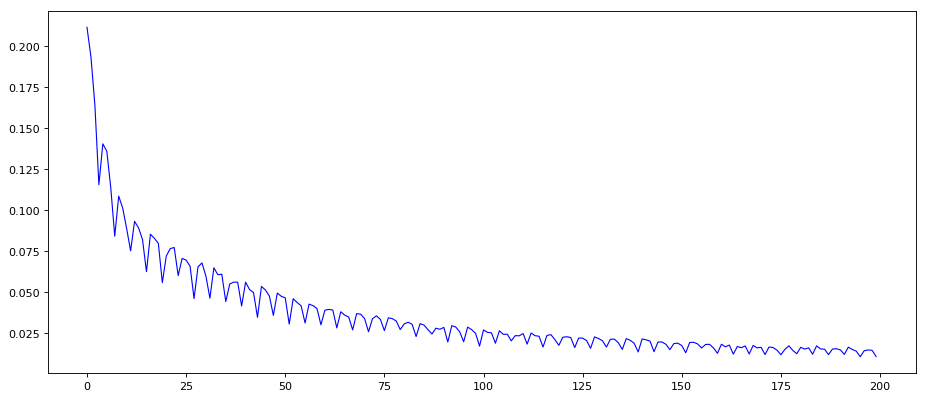

In [21]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(X_train_scaled)
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

### Test Datasets

In [22]:
# initial condition
def testDynamics(test_data):
    X_test_scaled = scaler.transform(test_data)
    X_test_scaled = X_test_scaled.reshape(int(samples/timesteps),timesteps,dim)
    yhat_predict = mod_2.predict(X_test_scaled)
    yhat_predict = yhat_predict.reshape(samples,dim)
    yhat_rescaled = scaler.inverse_transform(yhat_predict)
    plotComparison(test_data, 'Exact Dynamics', yhat_rescaled, 'Learnt Dynamics')

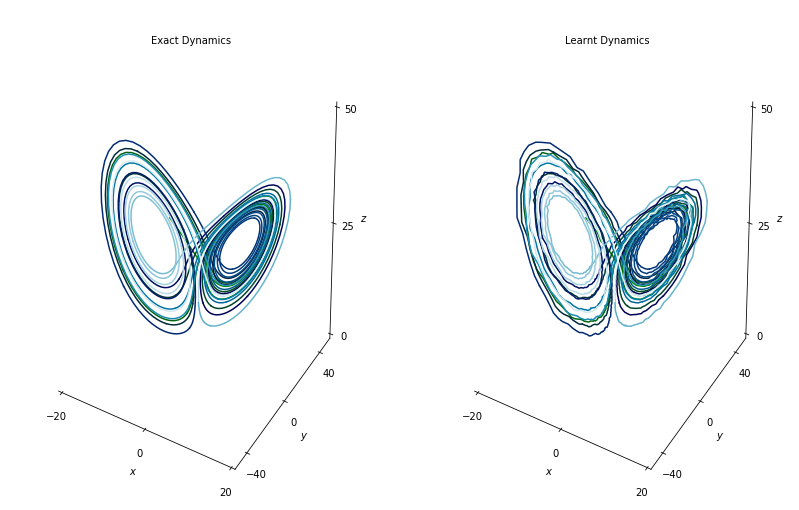

In [23]:
testDynamics(_data_train)

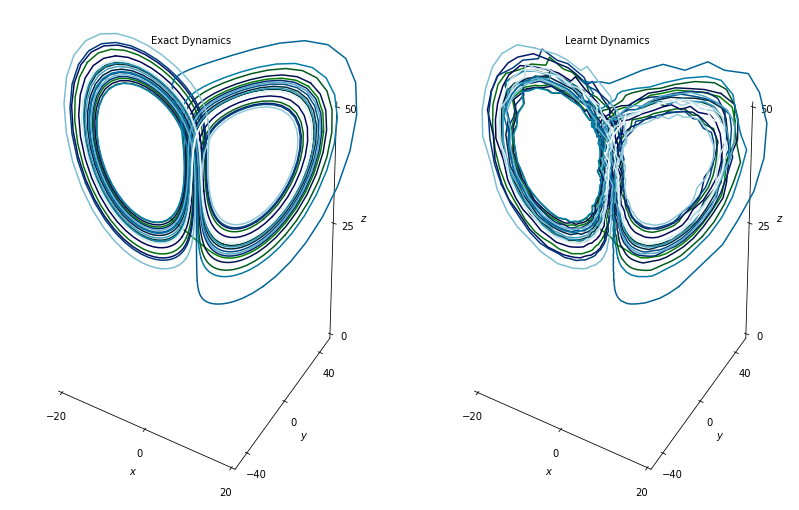

In [24]:
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)
testDynamics(_data_test_one)

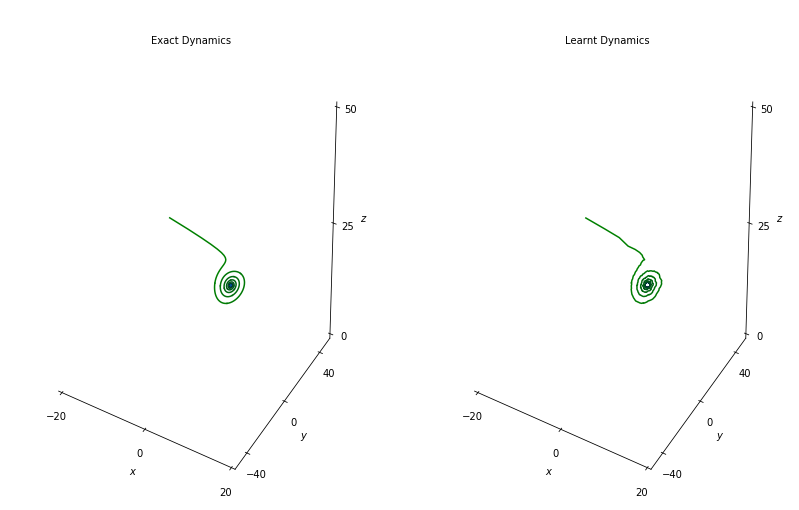

In [25]:
time_points = np.arange(0,25,0.01)
_data_test_two = simulate(time_points, x0, 0, 33.5, 2.5, 18.5)
testDynamics(_data_test_two)

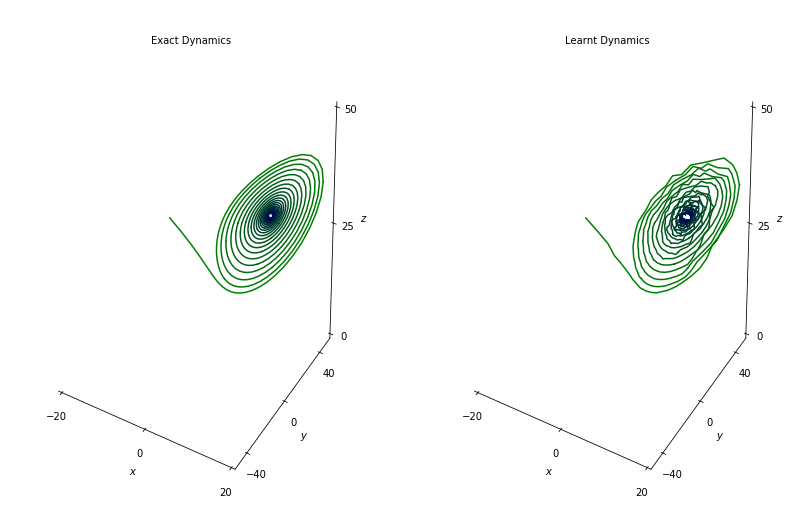

In [26]:
_data_test_three = simulate(time_points, x0, 0, 23.0, 5.9, 34.5)
testDynamics(_data_test_three )

## Complex Valued networks

### Unitary Evolution RNN

In [27]:
#from URNN import URNNCell
from SimpleURNN import SimpleURNNCell
tf.reset_default_graph()

n_steps = 10 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 100 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

basic_cell = SimpleURNNCell(num_units=n_neurons, num_in=3)
rnn_outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #Choose dynamic over static

learning_rate = 0.001 # Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, 2*n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
urnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(urnn_outputs-y)) #define the cost function

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [28]:
def reshape_dataset(data_set):
    data_set = data_set.reshape(int(samples/timesteps),timesteps,dim)
    return data_set
train_data = reshape_dataset(_data_train)
x_batches, y_batches = train_data, train_data
test_one = reshape_dataset(_data_test_one)
test_two = reshape_dataset(_data_test_two)
test_three = reshape_dataset(_data_test_three)

In [29]:
n_iterations =1500
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(urnn_outputs, feed_dict={X: test_one})
    y_pred_two = sess.run(urnn_outputs, feed_dict={X: test_two})
    y_pred_three = sess.run(urnn_outputs, feed_dict={X: test_three})

0 \MSE: 183.04787
100 \MSE: 0.44533676
200 \MSE: 0.15698183
300 \MSE: 0.06040865
400 \MSE: 0.022715412
500 \MSE: 0.009473157
600 \MSE: 0.0048767207
700 \MSE: 0.0030706483
800 \MSE: 0.0022048585
900 \MSE: 0.0017091843
1000 \MSE: 0.0013880637
1100 \MSE: 0.0011628227
1200 \MSE: 0.000995919
1300 \MSE: 0.0008654847
1400 \MSE: 0.0007591662


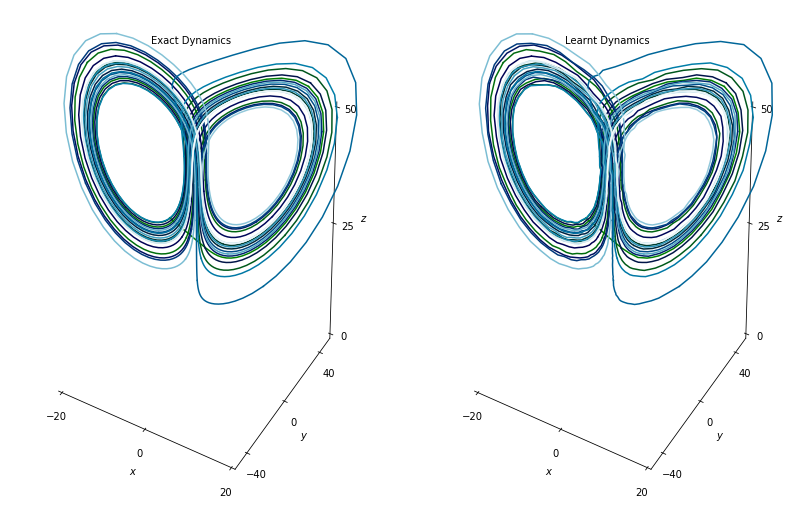

In [34]:
# initial condition
def test_dynamics_complex(test_data, yhat):
    yhat.shape = (samples, dim)
    test_data.shape = (samples, dim)
    plotComparison(test_data, 'Exact Dynamics', yhat, 'Learnt Dynamics')
    
test_dynamics_complex(test_one, y_pred_one)

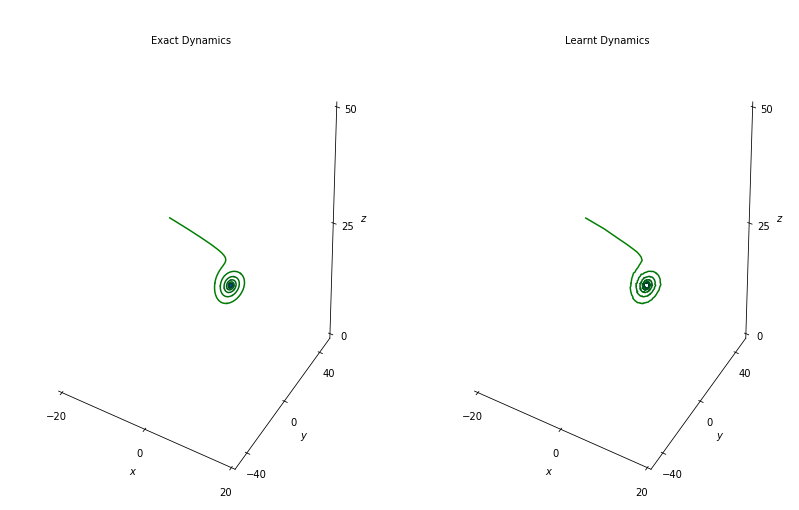

In [35]:
test_dynamics_complex(test_two, y_pred_two)

### Tunable Efficient Unitary RNN

In [36]:
tf.reset_default_graph()

n_steps = 10 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 100 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

#basic_cell = rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = ComplexRNNCell(n_neurons, 2)
hidden_out_comp, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.complex64) #Choose dynamic over static
rnn_outputs = tf.real(hidden_out_comp)


learning_rate = 3e-5 # Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
eurnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(eurnn_outputs-y)) #define the cost function

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=0.7) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [38]:
test_one = reshape_dataset(_data_test_one)
test_two = reshape_dataset(_data_test_two)
test_three = reshape_dataset(_data_test_three)
n_iterations =2500
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(eurnn_outputs, feed_dict={X: test_one})
    y_pred_two = sess.run(eurnn_outputs, feed_dict={X: test_two})
    y_pred_three = sess.run(eurnn_outputs, feed_dict={X: test_three})

0 \MSE: 1048.1641
100 \MSE: 777.8038
200 \MSE: 557.5632
300 \MSE: 380.5763
400 \MSE: 243.61255
500 \MSE: 144.1947
600 \MSE: 80.638626
700 \MSE: 50.391254
800 \MSE: 37.624557
900 \MSE: 28.153513
1000 \MSE: 20.768333
1100 \MSE: 15.054299
1200 \MSE: 10.738218
1300 \MSE: 7.5832033
1400 \MSE: 5.35037
1500 \MSE: 3.781859
1600 \MSE: 2.678798
1700 \MSE: 1.9095615
1800 \MSE: 1.370382
1900 \MSE: 0.98943204
2000 \MSE: 0.7165776
2100 \MSE: 0.519623
2200 \MSE: 0.37823528
2300 \MSE: 0.27953333
2400 \MSE: 0.21001132


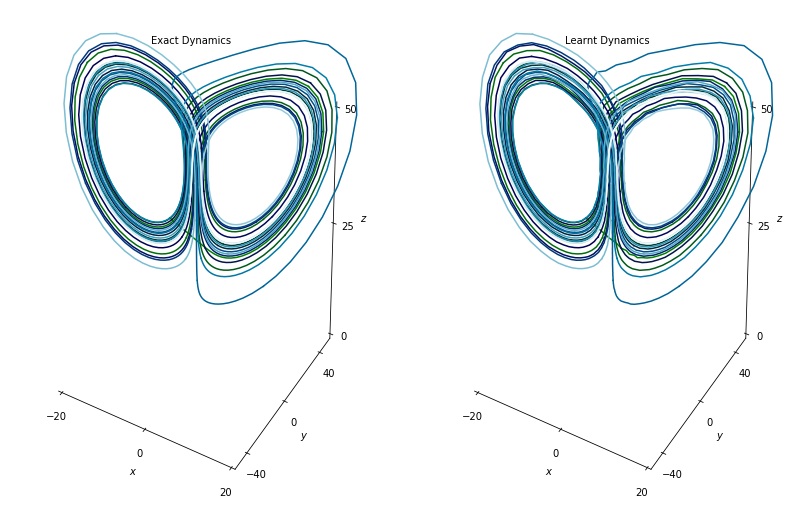

In [32]:
# initial condition
def test_dynamics_complex(test_data, yhat):
    yhat.shape = (samples, dim)
    test_data.shape = (samples, dim)
    plotComparison(test_data, 'Exact Dynamics', yhat, 'Learnt Dynamics')
    
test_dynamics_complex(test_one, y_pred_one)